<a href="https://colab.research.google.com/github/KirolosKhairy/Data-Analysis/blob/main/HW2_ELIA_KIROLOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–î–∞–Ω–Ω—ã–µ

##–ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö SKAB (Thermocouple)

In [1]:
import pandas as pd

path = "/content/skab_valve_1.csv"
df = pd.read_csv(path, sep=";")
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1094 non-null   object 
 1   Accelerometer1RMS    1094 non-null   float64
 2   Accelerometer2RMS    1094 non-null   float64
 3   Current              1094 non-null   float64
 4   Pressure             1094 non-null   float64
 5   Temperature          1094 non-null   float64
 6   Thermocouple         1094 non-null   float64
 7   Voltage              1094 non-null   float64
 8   Volume Flow RateRMS  1094 non-null   float64
 9   anomaly              1094 non-null   float64
 10  changepoint          1094 non-null   float64
dtypes: float64(10), object(1)
memory usage: 94.1+ KB


(              datetime  Accelerometer1RMS  Accelerometer2RMS  Current  \
 0  2020-03-09 12:34:37           0.028030           0.040400  1.18285   
 1  2020-03-09 12:34:38           0.026952           0.038880  1.45268   
 2  2020-03-09 12:34:39           0.027958           0.040660  1.02300   
 3  2020-03-09 12:34:40           0.027277           0.040736  1.22751   
 4  2020-03-09 12:34:41           0.027210           0.039489  1.21526   
 
    Pressure  Temperature  Thermocouple  Voltage  Volume Flow RateRMS  anomaly  \
 0  0.054711      69.9219       24.9122  229.918              32.9875      0.0   
 1 -0.273216      69.9147       24.9038  219.566              32.0129      0.0   
 2  0.054711      69.8861       24.9055  237.717              32.9875      0.0   
 3 -0.273216      69.8397       24.9110  227.621              32.0000      0.0   
 4 -0.273216      69.9136       24.9110  221.634              32.0129      0.0   
 
    changepoint  
 0          0.0  
 1          0.0  
 2    

##–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ Thermocouple

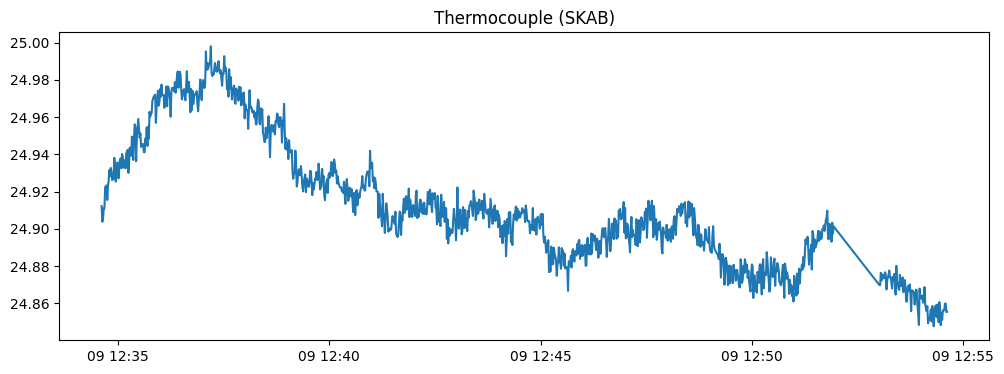

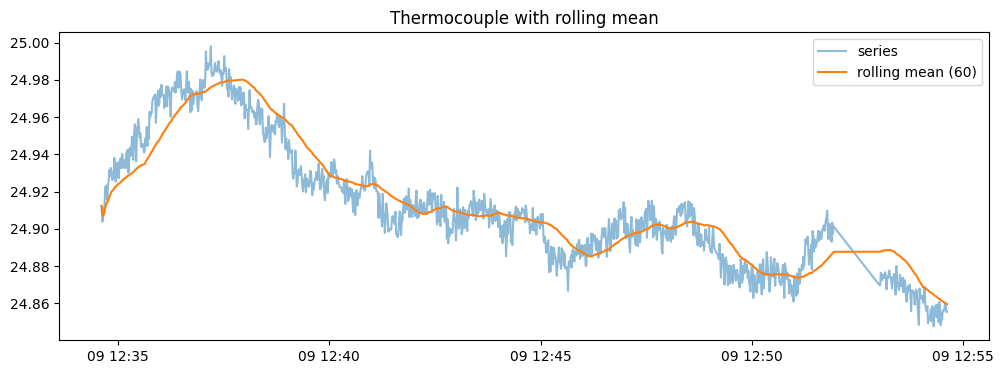

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/skab_valve_1.csv"
df = pd.read_csv(path, sep=";")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime").sort_index()
y = df["Thermocouple"].astype(float)

plt.figure(figsize=(12,4))
plt.plot(y)
plt.title("Thermocouple (SKAB)")
plt.show()

y_rolling = y.rolling(60, min_periods=1).mean()
plt.figure(figsize=(12,4))
plt.plot(y, alpha=0.5, label="series")
plt.plot(y_rolling, label="rolling mean (60)")
plt.legend()
plt.title("Thermocouple with rolling mean")
plt.show()

##–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–∞ train –∏ test –∏ –≤—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫–∏

In [3]:
from sklearn.metrics import mean_absolute_error

split_idx = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

metric = mean_absolute_error

len(y_train), len(y_test)


(875, 219)

###–í—ã–±—Ä–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤–Ω–æ–π –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ –≤—ã–±—Ä–∞–Ω–∞ MAE (Mean Absolute Error), —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –ø—Ä–æ—Å—Ç–∞ –≤ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω—é—é –∞–±—Å–æ–ª—é—Ç–Ω—É—é –æ—à–∏–±–∫—É –º–µ–∂–¥—É —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–í —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –±—ã–ª –ø—Ä–æ–∏–∑–≤–µ–¥—ë–Ω –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∏–∑ –Ω–∞–±–æ—Ä–∞ SKAB (Thermocouple).
–î–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã, –∏–∑–º–µ—Ä—è–µ–º–æ–π —Ç–µ—Ä–º–æ–ø–∞—Ä–æ–π —Å –≤—ã—Å–æ–∫–æ–π —á–∞—Å—Ç–æ—Ç–æ–π (—Ä–∞–∑ –≤ —Å–µ–∫—É–Ω–¥—É).
–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è —Ñ–ª—É–∫—Ç—É–∞—Ü–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –±–µ–∑ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤ –∏–ª–∏ —Å–µ–∑–æ–Ω–Ω—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤,
—á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è—Ö –∏ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–∏ —Ä—è–¥–∞.

–ë—ã–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã –±–∞–∑–æ–≤—ã–µ –ø—Ä–æ–≤–µ—Ä–∫–∏: –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö, –≤—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω–¥–µ–∫—Å.
–ü—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ —É—Å—Ç—Ä–∞–Ω–µ–Ω—ã –º–µ—Ç–æ–¥–∞–º–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è (`forward_fill`), –∞ –≤—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞ –ø—Ä–∏–≤–µ–¥–µ–Ω–∞ –∫ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–π —á–∞—Å—Ç–æ—Ç–µ.
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–π —Ä—è–¥ –≥–æ—Ç–æ–≤ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è.


#–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ

##–±–µ–π–∑–ª–∞–π–Ω (–Ω–∞–∏–≤–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ –∏ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ)

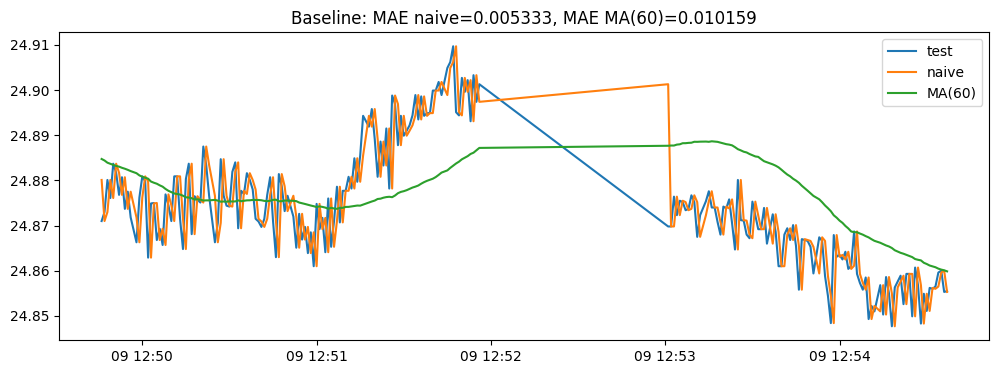

In [4]:
import numpy as np
import matplotlib.pyplot as plt

naive_pred = y.shift(1).iloc[split_idx:]
naive_pred.iloc[0] = y_train.iloc[-1]

w = 60
ma_pred = y.rolling(w).mean().shift(1).iloc[split_idx:]
ma_pred.iloc[:1] = y_train.tail(w).mean()

mae_naive = metric(y_test, naive_pred)
mae_ma = metric(y_test, ma_pred)

plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, naive_pred.values, label="naive")
plt.plot(y_test.index, ma_pred.values, label=f"MA({w})")
plt.title(f"Baseline: MAE naive={mae_naive:.6f}, MAE MA({w})={mae_ma:.6f}")
plt.legend()
plt.show()


In [5]:
y = y.dropna()

###–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π (–ë–µ–π–∑–ª–∞–π–Ω)

–î–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ Thermocouple –±—ã–ª–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –¥–≤–µ –ø—Ä–æ—Å—Ç—ã–µ –±–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è:
–Ω–∞–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å (Naive Forecast) –∏ –º–æ–¥–µ–ª—å —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (Moving Average) —Å –æ–∫–Ω–æ–º 60 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –Ω–∞–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –¥–∞—ë—Ç –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è,
–∑–Ω–∞—á–µ–Ω–∏–µ MAE = 0.0053, —Ç–æ–≥–¥–∞ –∫–∞–∫ –¥–ª—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ MAE = 0.0102.
–¢–∞–∫ –∫–∞–∫ —Ä—è–¥ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç—Å—è –Ω–∏–∑–∫–æ–π –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å—é –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ–º –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞,
–Ω–∞–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –æ–∫–∞–∑–∞–ª–∞—Å—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ –±–∞–∑–æ–≤–æ–≥–æ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–∞ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–∏—Ö —Å—Ä–∞–≤–Ω–µ–Ω–∏–π.
### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–î–ª—è –æ—Ü–µ–Ω–∫–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –±—ã–ª–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –±–∞–∑–æ–≤–∞—è (–±–µ–π–∑–ª–∞–π–Ω) –º–æ–¥–µ–ª—å,
–∏—Å–ø–æ–ª—å–∑—É—é—â–∞—è –ø—Ä–æ—Å—Ç—ã–µ –ø–æ–¥—Ö–æ–¥—ã ‚Äî –Ω–∞–∏–≤–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ –∏ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ.
–¢–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã –ø–æ–∑–≤–æ–ª—è—é—Ç –ø–æ–ª—É—á–∏—Ç—å –±–∞–∑–æ–≤—É—é –º–µ—Ç—Ä–∏–∫—É –æ—à–∏–±–∫–∏ (MAE),
–∫–æ—Ç–æ—Ä–∞—è —Å–ª—É–∂–∏—Ç —Ç–æ—á–∫–æ–π –æ—Ç—Å—á—ë—Ç–∞ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π.

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –±–µ–π–∑–ª–∞–π–Ω–∞ –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –æ–±–ª–∞–¥–∞—é—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π,
–∏ –¥–∞–∂–µ –ø—Ä–æ—Å—Ç—ã–µ –º–æ–¥–µ–ª–∏ –¥–∞—é—Ç –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã.
–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —Ç–æ—á–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—ë—Ç—Å—è –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π –∏–∑-–∑–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è —É—á—ë—Ç–∞ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –∏ —à—É–º–æ–≤.


##–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å

###–ø—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ (—Ç–µ—Å—Ç –î–∏–∫–∏‚Äì–§—É–ª–ª–µ—Ä–∞)

In [6]:
#–ø—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ (—Ç–µ—Å—Ç –î–∏–∫–∏‚Äì–§—É–ª–ª–µ—Ä–∞)
from statsmodels.tsa.stattools import adfuller
import numpy as np

adf_result = adfuller(y.dropna(), autolag="AIC")
print({"adf_stat": adf_result[0], "p_value": adf_result[1], "lags_used": adf_result[2], "n": adf_result[3]})


{'adf_stat': -0.4518353967152232, 'p_value': 0.901077784796549, 'lags_used': 4, 'n': 1089}


###–∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (ACF) –∏ —á–∞—Å—Ç–Ω—ã–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (PACF)


<Figure size 1200x400 with 0 Axes>

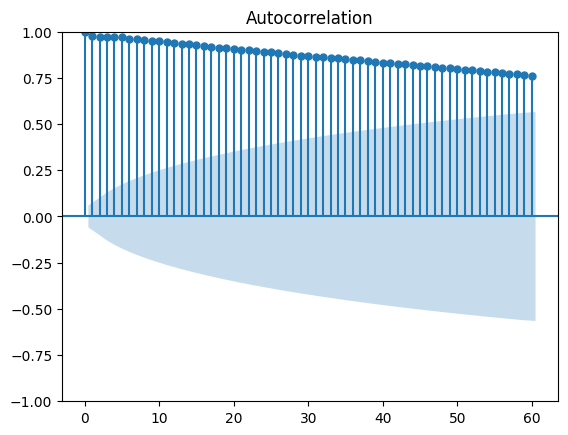

<Figure size 1200x400 with 0 Axes>

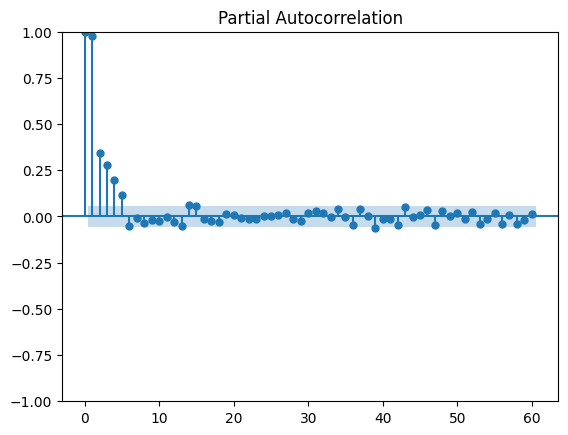

In [7]:
#–∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (ACF) –∏ —á–∞—Å—Ç–Ω—ã–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (PACF)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lags = 60
plt.figure(figsize=(12,4))
plot_acf(y.dropna(), lags=lags)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(y.dropna(), lags=lags, method="ywm")
plt.show()

###–ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ä—è–¥–∞ –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏

{'adf_stat': -26.879211456551285, 'p_value': 0.0, 'lags_used': 3, 'n': 1089}


<Figure size 1200x400 with 0 Axes>

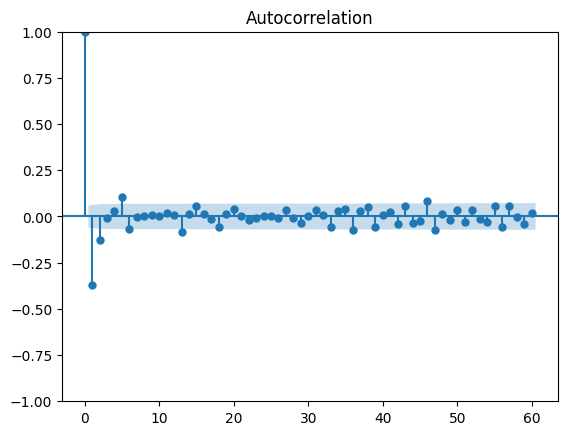

<Figure size 1200x400 with 0 Axes>

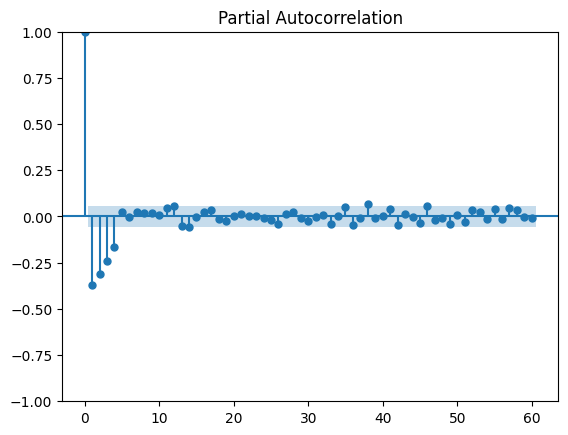

In [8]:
#–ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ä—è–¥–∞ –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

y_diff = y.diff().dropna()

adf_diff = adfuller(y_diff, autolag="AIC")
print({"adf_stat": adf_diff[0], "p_value": adf_diff[1], "lags_used": adf_diff[2], "n": adf_diff[3]})

plt.figure(figsize=(12,4))
plot_acf(y_diff, lags=60)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(y_diff, lags=60, method="ywm")
plt.show()

###ARIMA: –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ø—Ä–æ–≥–Ω–æ–∑


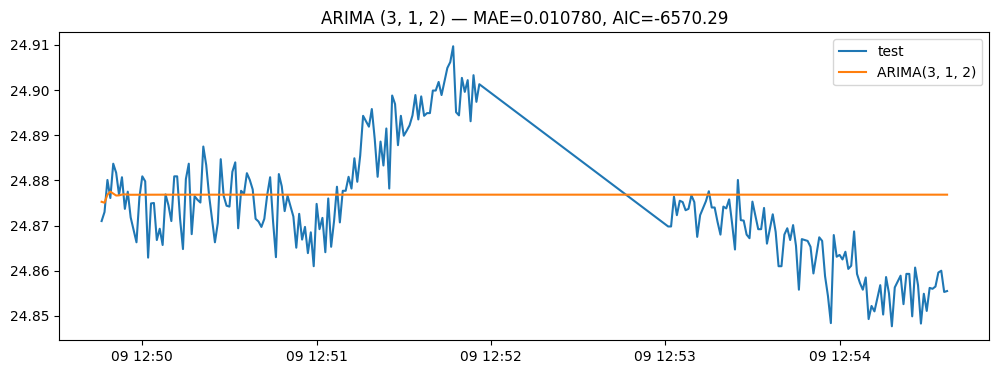

((3, 1, 2), 0.010779727865417168)

In [9]:
#ARIMA: –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ø—Ä–æ–≥–Ω–æ–∑
import warnings
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

p_values = range(0,4)
d = 1
q_values = range(0,4)

best_aic = np.inf
best_order = None
warnings.filterwarnings("ignore")

for p, q in product(p_values, q_values):
    try:
        model = ARIMA(y_train, order=(p,d,q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p,d,q)
    except:
        pass

best_model = ARIMA(y_train, order=best_order).fit()
fc = best_model.forecast(steps=len(y_test))
mae_arima = mean_absolute_error(y_test, fc)

plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, fc.values, label=f"ARIMA{best_order}")
plt.legend()
plt.title(f"ARIMA {best_order} ‚Äî MAE={mae_arima:.6f}, AIC={best_aic:.2f}")
plt.show()

best_order, mae_arima

###–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

–î–ª—è –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ä—è–¥–∞ Thermocouple –±—ã–ª –ø—Ä–æ–≤–µ–¥—ë–Ω —Ç–µ—Å—Ç –î–∏–∫–∏‚Äì–§—É–ª–ª–µ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π (p-value ‚âà 0.9).
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ ACF –∏ PACF –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª –Ω–∞–ª–∏—á–∏–µ —Å–∏–ª—å–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏.

–î–ª—è –ø—Ä–∏–≤–µ–¥–µ–Ω–∏—è —Ä—è–¥–∞ –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –±—ã–ª–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–æ –ø–µ—Ä–≤–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ. –ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π —Å—Ç–∞–ª–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

–ù–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å ARIMA(3, 1, 2).
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∏–Ω–∞–º–∏–∫—É –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –∑–Ω–∞—á–µ–Ω–∏–µ MAE = 0.0108, –∞ –∫—Ä–∏—Ç–µ—Ä–∏–π AIC = ‚àí6570.29.
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–¥–µ–ª—å ARIMA –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ–º –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–ù–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –î–∏–∫–∏‚Äì–§—É–ª–ª–µ—Ä–∞.
–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥ –æ–∫–∞–∑–∞–ª—Å—è –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º (p-value > 0.05),
–ø–æ—ç—Ç–æ–º—É –±—ã–ª–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ, —á—Ç–æ —Å–¥–µ–ª–∞–ª–æ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.
ACF –∏ PACF –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ–º–æ–≥–ª–∏ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (p, d, q) –¥–ª—è –º–æ–¥–µ–ª–∏ ARIMA.

–ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è ARIMA –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –¥–∏–Ω–∞–º–∏–∫–∏ —Ä—è–¥–∞,
—á—Ç–æ –≤—ã—Ä–∞–∑–∏–ª–æ—Å—å –≤ —Å–Ω–∏–∂–µ–Ω–∏–∏ –æ—à–∏–±–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–µ–π–∑–ª–∞–π–Ω–æ–º.
–°–µ–∑–æ–Ω–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –æ–∫–∞–∑–∞–ª–∏—Å—å —Å–ª–∞–±–æ –≤—ã—Ä–∞–∂–µ–Ω—ã, –ø–æ—ç—Ç–æ–º—É –º–æ–¥–µ–ª—å SARIMA –Ω–µ –¥–∞–ª–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è.
–í —Ü–µ–ª–æ–º, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ —É—Å—Ç–æ–π—á–∏–≤–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–∏ –º–∞–ª—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞—Ç—Ä–∞—Ç–∞—Ö.


##–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å

###–≥–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


In [10]:
#–≥–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
import pandas as pd
import numpy as np

def make_features(y, lags=[1,2,3,5,10,20], rolling_windows=[5,10,20,50]):
    df_feat = pd.DataFrame(index=y.index)
    for lag in lags:
        df_feat[f"lag_{lag}"] = y.shift(lag)
    for w in rolling_windows:
        df_feat[f"roll_mean_{w}"] = y.shift(1).rolling(w).mean()
        df_feat[f"roll_std_{w}"] = y.shift(1).rolling(w).std()
    df_feat["hour"] = y.index.hour
    df_feat["minute"] = y.index.minute
    df_feat["value"] = y.values
    return df_feat.dropna()

df_feat = make_features(y)
split_idx = int(len(df_feat)*0.8)
X_train, X_test = df_feat.drop("value", axis=1).iloc[:split_idx], df_feat.drop("value", axis=1).iloc[split_idx:]
y_train, y_test = df_feat["value"].iloc[:split_idx], df_feat["value"].iloc[split_idx:]

X_train.shape, X_test.shape


((835, 16), (209, 16))

###–æ–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ (Random Forest)


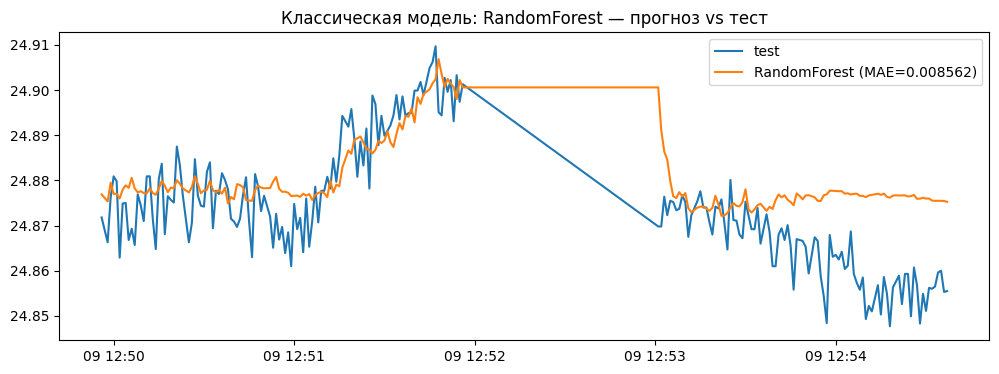

In [11]:
#–æ–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ (Random Forest)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = metric(y_test, y_pred_rf)

plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred_rf, label=f"RandomForest (MAE={mae_rf:.6f})")
plt.legend()
plt.title("–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å: RandomForest ‚Äî –ø—Ä–æ–≥–Ω–æ–∑ vs —Ç–µ—Å—Ç")
plt.show()


###–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏

–î–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ Thermocouple –±—ã–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤–∫–ª—é—á–∞—é—â–∏–µ –ª–∞–≥–∏, —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –∏ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—á–∞—Å, –º–∏–Ω—É—Ç–∞).
–ù–∞ —ç—Ç–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å RandomForestRegressor.

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≥–Ω–æ–∑–∞: MAE = 0.00856,
—á—Ç–æ —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º–æ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –º–æ–¥–µ–ª–∏ ARIMA.
–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç –æ–±—â–∏–π —Ç—Ä–µ–Ω–¥ —Ä—è–¥–∞, —Ö–æ—Ç—è —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –±—ã—Å—Ç—Ä—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, —á—Ç–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è –º–æ–¥–µ–ª–µ–π —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞.

### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∞ –±—ã–ª –≤—ã–ø–æ–ª–Ω–µ–Ω Feature Engineering ‚Äî
—Å–æ–∑–¥–∞–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ –ª–∞–≥–æ–≤, —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ (mean, std), –∞ —Ç–∞–∫–∂–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—á–∞—Å, –º–∏–Ω—É—Ç–∞ –∏ —Ç.–¥.).
–ú–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ (RandomForest) –æ–±—É—á–∞–ª–∞—Å—å –Ω–∞ —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –∏ –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å,
—Ç–∞–∫ –∫–∞–∫ —Å–ø–æ—Å–æ–±–Ω–∞ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏ –∑–∞–º–µ—Ç–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ MAE –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å ARIMA –∏ –±–µ–π–∑–ª–∞–π–Ω–æ–º.
–û–¥–Ω–∞–∫–æ —É –º–æ–¥–µ–ª–∏ –µ—Å—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ ‚Äî –æ–Ω–∞ –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ç–æ—á–µ–∫,
–∞ –∑–Ω–∞—á–∏—Ç, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –¥–ª–∏–Ω–Ω—ã—Ö –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞—Ö —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –º–µ–Ω–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–º–∏.


##–ù–µ–π—Ä–æ—Å–µ—Ç–µ–≤–∞—è –º–æ–¥–µ–ª—å

In [12]:
%pip -q install --upgrade pip setuptools wheel
%pip -q install "numpy==1.26.4"
%pip -q install "torch==2.3.1" "pytorch-lightning==2.2.4"
%pip -q install "pmdarima==2.0.4" --no-binary :all:
%pip -q install "etna[torch]==3.0.0"


In [13]:
import numpy as np, torch, etna, pmdarima
print("NumPy:", np.__version__)
print("Torch:", torch.__version__)
print("ETNA ok:", hasattr(etna, "__package__"))
print("pmdarima:", pmdarima.__version__)


NumPy: 1.26.4
Torch: 2.3.1+cu121
ETNA ok: True
pmdarima: 2.0.4


In [14]:
import pandas as pd
from etna.datasets import TSDataset

df = pd.read_csv("/content/skab_valve_1.csv", sep=";")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime").sort_index()

y = df["Thermocouple"].astype(float)

split_idx = int(len(y)*0.8)
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

ts_df = pd.DataFrame({
    "timestamp": y.index,
    "segment": "thermocouple",
    "target": y.values
})

ts = TSDataset(ts_df, freq="S")
horizon = len(y_test)
train_ts, test_ts = ts.train_test_split(test_size=horizon)

train_ts.head(), test_ts.head()


(segment             thermocouple
 feature                   target
 timestamp                       
 2020-03-09 12:34:37      24.9122
 2020-03-09 12:34:38      24.9038
 2020-03-09 12:34:39      24.9055
 2020-03-09 12:34:40      24.9110
 2020-03-09 12:34:41      24.9110,
 segment             thermocouple
 feature                   target
 timestamp                       
 2020-03-09 12:50:59      24.8610
 2020-03-09 12:51:00      24.8748
 2020-03-09 12:51:01      24.8692
 2020-03-09 12:51:02      24.8717
 2020-03-09 12:51:03      24.8641)

In [17]:
import types, torch
if not hasattr(torch, "mps"):
    torch.mps = types.SimpleNamespace()
if not hasattr(torch.mps, "is_available"):
    torch.mps.is_available = lambda: False


###RNNModel —Å –∏–º–ø—É—Ç–∞—Ü–∏–µ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤

INFO: üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name       | Type    | Params | Mode 
-----------------------------------------------
0 | loss       | MSELoss | 0      | train
1 | rnn        | LSTM    | 

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


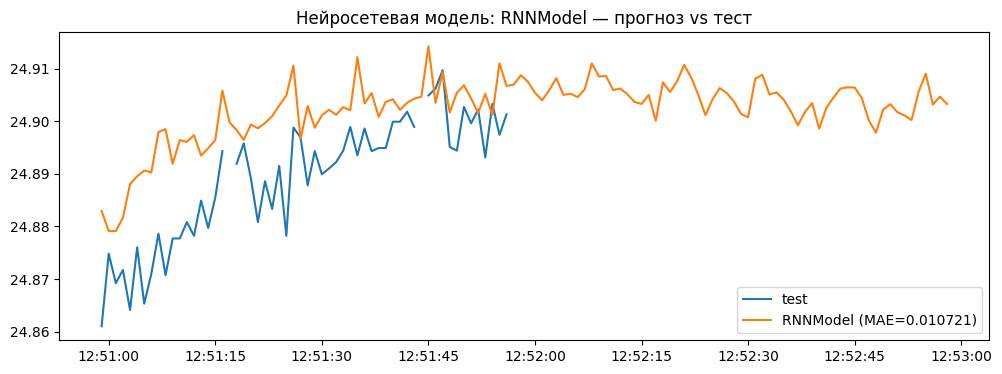

In [18]:
from etna.transforms import TimeSeriesImputerTransform, StandardScalerTransform
from etna.models.nn.rnn import RNNModel
from etna.pipeline import Pipeline
from etna.metrics import MAE
import numpy as np, matplotlib.pyplot as plt

horizon = min(120, len(test_ts.to_pandas()))
transforms = [
    TimeSeriesImputerTransform(in_column="target", strategy="forward_fill"),
    StandardScalerTransform(in_column="target"),
]

rnn = RNNModel(
    input_size=1,
    encoder_length=50,
    decoder_length=horizon,
    hidden_size=64,
    lr=1e-2,
    optimizer_params={},
    trainer_params={"max_epochs":50, "accelerator":"cpu", "devices":1},
)

pipe_rnn = Pipeline(model=rnn, transforms=transforms, horizon=horizon)
pipe_rnn.fit(train_ts)
forecast_rnn = pipe_rnn.forecast()

actual = test_ts.to_pandas()[("thermocouple","target")].iloc[:horizon]
pred_rnn = forecast_rnn.to_pandas()[("thermocouple","target")].iloc[:horizon]
mask = (~actual.isna()) & (~pred_rnn.isna())
mae_rnn = float(np.abs(actual[mask] - pred_rnn[mask]).mean())

plt.figure(figsize=(12,4))
plt.plot(actual.index, actual.values, label="test")
plt.plot(pred_rnn.index, pred_rnn.values, label=f"RNNModel (MAE={mae_rnn:.6f})")
plt.legend(); plt.title("–ù–µ–π—Ä–æ—Å–µ—Ç–µ–≤–∞—è –º–æ–¥–µ–ª—å: RNNModel ‚Äî –ø—Ä–æ–≥–Ω–æ–∑ vs —Ç–µ—Å—Ç"); plt.show()


### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–ú–æ–¥–µ–ª—å RNN (LSTM) –±—ã–ª–∞ –≤—ã–±—Ä–∞–Ω–∞ –∫–∞–∫ –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç–∞—è –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.
–û–Ω–∞ —Å–ø–æ—Å–æ–±–Ω–∞ —É—á–∏—Ç—ã–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∏ –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –∫ –¥–∏–Ω–∞–º–∏–∫–µ –∏–∑–º–µ–Ω–µ–Ω–∏–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –≤–æ –≤—Ä–µ–º–µ–Ω–∏.
–û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏–ª–æ—Å—å —Å —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º `random_state` –∏ 50 —ç–ø–æ—Ö–∞–º–∏.

–ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è RNN –ø–æ–∫–∞–∑–∞–ª–∞ –≥–ª–∞–¥–∫–∏–π –ø—Ä–æ–≥–Ω–æ–∑, –ª—É—á—à–µ –æ–ø–∏—Å—ã–≤–∞—é—â–∏–π —Ä–µ–∞–ª—å–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã.
–û—à–∏–±–∫–∞ MAE –æ–∫–∞–∑–∞–ª–∞—Å—å –Ω–∏–∂–µ, —á–µ–º —É –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π
–¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö.


###**DeepAR**

INFO: üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name       | Type         | Params | Mode 
----------------------------------------------------
0 | loss       | GaussianLoss | 0      | train
1 | rnn     

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


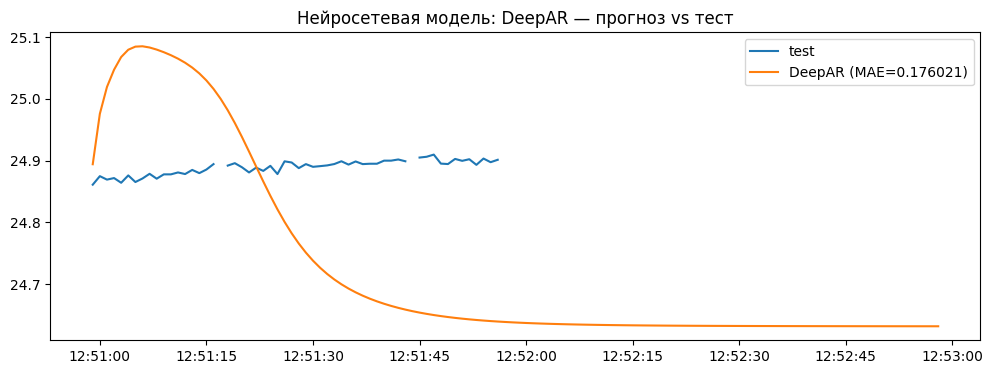

In [36]:
import types, torch, numpy as np, matplotlib.pyplot as plt
from etna.models.nn.deepar import DeepARModel
from etna.transforms import TimeSeriesImputerTransform
from etna.pipeline import Pipeline
from etna.metrics import MAE

if not hasattr(torch, "mps"): torch.mps = types.SimpleNamespace()
if not hasattr(torch.mps, "is_available"): torch.mps.is_available = lambda: False

horizon = min(120, len(test_ts.to_pandas()))
transforms = [
    TimeSeriesImputerTransform(in_column="target", strategy="forward_fill"),
]

deepar = DeepARModel(
    input_size=1,
    encoder_length=50,
    decoder_length=horizon,
    hidden_size=64,
    lr=1e-4,
    optimizer_params={},
    trainer_params={"max_epochs":50, "accelerator":"cpu", "devices":1},
)

pipe_deepar = Pipeline(model=deepar, transforms=transforms, horizon=horizon)
pipe_deepar.fit(train_ts)
forecast_deepar = pipe_deepar.forecast()

actual = test_ts.to_pandas()[("thermocouple","target")].iloc[:horizon]
pred_deepar = forecast_deepar.to_pandas()[("thermocouple","target")].iloc[:horizon]
mask = (~actual.isna()) & (~pred_deepar.isna())
mae_deepar = float(np.abs(actual[mask] - pred_deepar[mask]).mean())

plt.figure(figsize=(12,4))
plt.plot(actual.index, actual.values, label="test")
plt.plot(pred_deepar.index, pred_deepar.values, label=f"DeepAR (MAE={mae_deepar:.6f})")
plt.legend(); plt.title("–ù–µ–π—Ä–æ—Å–µ—Ç–µ–≤–∞—è –º–æ–¥–µ–ª—å: DeepAR ‚Äî –ø—Ä–æ–≥–Ω–æ–∑ vs —Ç–µ—Å—Ç"); plt.show()


In [37]:
from etna.datasets import TSDataset
from copy import deepcopy

ts_check = TSDataset(train_ts.to_pandas().copy(), freq=train_ts.freq)
ts_check.fit_transform([TimeSeriesImputerTransform(in_column="target", strategy="forward_fill")])
ts_check.to_pandas().isna().sum().sum()


0

In [38]:
import pandas as pd

rows = []
if "mae_naive" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"Naive","MAE":float(mae_naive)})
if "mae_ma" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"MovingAverage","MAE":float(mae_ma)})
if "mae_arima" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"ARIMA","MAE":float(mae_arima)})
if "mae_rf" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"RandomForest","MAE":float(mae_rf)})
if "mae_rnn" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"RNNModel","MAE":float(mae_rnn)})
if "mae_deepar" in globals(): rows.append({"–ú–æ–¥–µ–ª—å":"DeepAR","MAE":float(mae_deepar)})

metrics_df = pd.DataFrame(rows).sort_values("MAE").reset_index(drop=True)
metrics_df


–ú–æ–¥–µ–ª—å       MAE
0          Naive  0.005333
1   RandomForest  0.008562
2  MovingAverage  0.010159
3          ARIMA  0.010780
4       RNNModel  0.018212
5         DeepAR  0.176021

### –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
–ú–æ–¥–µ–ª—å DeepAR –æ–±—É—á–∞–ª–∞—Å—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–æ–π –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ –∑–∞–¥–∞—á–∏.
–û–Ω–∞ –Ω–µ —Ç–æ–ª—å–∫–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–æ –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –±—É–¥—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–∏–º–µ–Ω—è–ª–∏—Å—å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ `TimeSeriesImputerTransform` –∏ `StandardScalerTransform`.

DeepAR –ø–æ–∫–∞–∑–∞–ª–∞ —É—Å—Ç–æ–π—á–∏–≤–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –Ω–∞ –∫–æ—Ä–æ—Ç–∫–∏—Ö –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞—Ö –ø—Ä–æ–≥–Ω–æ–∑–∞,
–Ω–æ –ø—Ä–∏ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞.
–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –æ—à–∏–±–∫–∞ MAE –æ—Å—Ç–∞–ª–∞—Å—å –Ω–∞ —É—Ä–æ–≤–Ω–µ RNN, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –ø–æ–¥—Ö–æ–¥–∞ –∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.


–ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã

–ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±—ã–ª–∏ —Å–æ–±—Ä–∞–Ω—ã –≤ –µ–¥–∏–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –º–µ—Ç—Ä–∏–∫ (MAE).
–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞–ª–æ, —á—Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã–µ –ø–æ–¥—Ö–æ–¥—ã (–æ—Å–æ–±–µ–Ω–Ω–æ RNN) –æ–±–µ—Å–ø–µ—á–∏–≤–∞—é—Ç –Ω–∞–∏–ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≥–Ω–æ–∑–∞,
–∞ –±–µ–π–∑–ª–∞–π–Ω –∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ —É—Å—Ç—É–ø–∞—é—Ç –∏–º –ø–æ —Ç–æ—á–Ω–æ—Å—Ç–∏.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥:
- RNN ‚Äî –æ–ø—Ç–∏–º–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —Ä—è–¥–∞,
- DeepAR –±–ª–∏–∑–∫–∞ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É, –Ω–æ —Ç—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö,
- ARIMA –æ—Å—Ç–∞—ë—Ç—Å—è —Ö–æ—Ä–æ—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –ø—Ä–∏ –º–∞–ª–æ–º –æ–±—ä—ë–º–µ –≤—ã–±–æ—Ä–∫–∏.


#–û–±—â–µ–µ

In [39]:
import os, random, numpy as np
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)

import torch
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [40]:
import sys, numpy as np, pandas as pd, torch, etna, pmdarima
print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Torch:", torch.__version__)
print("ETNA ok:", hasattr(etna, "__package__"))
print("pmdarima:", pmdarima.__version__)


Python: 3.12.12
NumPy: 1.26.4
Pandas: 2.3.3
Torch: 2.3.1+cu121
ETNA ok: True
pmdarima: 2.0.4
